#Image Statistics of Deep Neural Network Filters#

##Getting the data##

Alright so our goal is to understand the relation between the responses of units in the DNN and the weights of those units. To do this you'll need the weights of all the filters in the DNN and the the responses of the DNN to alot of images. I load those below.

In [85]:
#to analyze this data you will need python, jupyter notebook, xarray, numpy
#an easy way to do this is to install conda then on the terminal 
#call conda install for each package.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import xarray as xr

#here we load up all the sample data sets of responses
layer_names = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5']
load_resp_dir = '/loc6tb/data/responses/wctx/' #you will need to change this to where ever you put the files
load_wts_dir = '/loc6tb/data/an_results/wtmaps/' #you will need to change this to where ever you put the files

layer_resp = {}
layer_wts = {}
for layer_name in layer_names:
    layer_resp[layer_name] = xr.open_dataset(load_resp_dir + layer_name + '_0.nc')['resp']
    layer_wts[layer_name] = xr.open_dataset(load_wts_dir + layer_name + '_filts.nc')['filts']

conv1resp = layer_resp['conv1']

conv1wts = layer_wts['conv1']

ims = xr.open_dataset(load_resp_dir + 'data_0.nc')['resp']

In [86]:
print('The filter weights\n')
print(conv1wts)
print('\n \n The filter responses to images:\n')
print(conv1resp)

The filter weights

<xarray.DataArray 'filts' (unit: 96, channel: 3, r: 11, c: 11)>
array([[[[-0.001214, ..., -0.020662],
         ..., 
         [-0.000825, ..., -0.009904]],

        ..., 
        [[-0.014439, ..., -0.021937],
         ..., 
         [-0.003733, ...,  0.024118]]],


       ..., 
       [[[ 0.007968, ..., -0.041835],
         ..., 
         [ 0.007691, ..., -0.020299]],

        ..., 
        [[ 0.001863, ..., -0.0612  ],
         ..., 
         [ 0.00404 , ..., -0.020825]]]], dtype=float32)
Coordinates:
  * unit     (unit) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * r        (r) int32 0 1 2 3 4 5 6 7 8 9 10
  * c        (c) int32 0 1 2 3 4 5 6 7 8 9 10
  * channel  (channel) int32 0 1 2

 
 The filter responses to images:

<xarray.DataArray 'resp' (im: 100, unit: 96, r: 55, c: 55)>
[29040000 values with dtype=float32]
Coordinates:
    imname   (im) |S28 ...
  * im       (im) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * unit  

First I've printed the weights at the top you see there were 96 units 3 feature channels for each unit and 11 rows by 11 cols of spatial channels.

Second I've printed the response data file for the 1st convolutional layer. At the top you see there were 100 images shown, 96 units that had responses, at 55 rows X 55 columns positions. For a grand total of about 29 million responses.

Lets look at the first unit and its responses to an image.

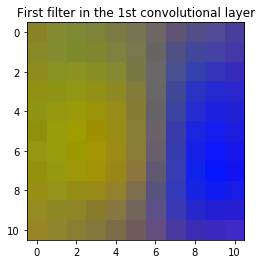

In [90]:
filt_num = 77
filt = conv1wts.isel(unit=filt_num).transpose('r','c','channel')
filt = filt - filt.min()
filt = filt/filt.max()
plt.imshow(filt);plt.title('First filter in the 1st convolutional layer');

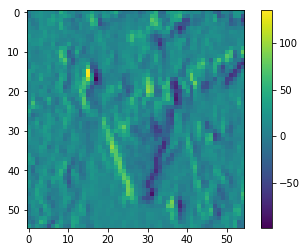

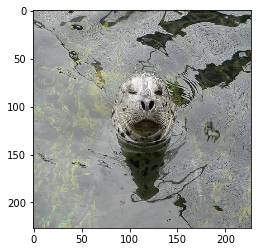

In [91]:
im = 32
plt.figure()
resp = conv1resp.isel(im=im, unit=filt_num).transpose('r','c');
plt.imshow(resp.values)
plt.colorbar();
plt.figure()
the_input_im = ims.isel(im=im).transpose('r','c','unit')
the_input_im = the_input_im - the_input_im.min()
the_input_im = the_input_im/the_input_im.max()
plt.imshow(the_input_im[..., ::-1])

Try looking at a couple different convolutional filters and image responses to those convolutional filters and make sure you have a firm understanding of how the images and the filters relate.

##The analysis##

What we are specifically interested in is how different spatial channels of these filters contribute to the responses of a unit. For example in the first layer there are 3 feature channels and at the 11 x 11 = 121 positions in the filter the weights on each of those filters is different. We can picture each position as 3-d vector we are interested in how the correlation between those vectors translates to correlations in ther responses for natural images. How do we find this out? Well we plot the relevant data, we want to plot the correlation between spatial channel filter weights and the correlation of their response to many images.

So we will need a large ensemble of inputs: for conv1 this will be 